# Use Cross Entropy as Loss Function

## Objectives

* use tf.nn.softmax_cross_entropy_with_logits as loss function
* fix the learner for NAND and NOR functions

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'0.10.0'

### Changes

* use tf.nn.softmax_cross_entropy_with_logits as loss function

In [3]:
num_features = 2
num_classes = 2

x = tf.placeholder(tf.float32, [None, num_features])
y = tf.placeholder(tf.float32, [None, num_classes])

w = tf.Variable(tf.zeros([num_features, num_classes]))
b = tf.Variable(tf.zeros([num_classes]))

logits = tf.matmul(x, w) + b
y_pred = tf.nn.softmax(logits)

loss = (y - y_pred)**2
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y)

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

### Create dictionaries for logical functions

In [4]:
and_dic  = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[1.,0.],[1.,0.],[1.,0.],[0.,1.]]}
or_dic   = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[1.,0.],[0.,1.],[0.,1.],[0.,1.]]}
nand_dic = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[0.,1.],[0.,1.],[0.,1.],[1.,0.]]}
nor_dic  = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[0.,1.],[1.,0.],[1.,0.],[1.,0.]]}
xor_dic  = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[1.,0.],[0.,1.],[0.,1.],[1.,0.]]}

### The same helper function used earlier to plot matrices as heatmaps

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def heatmap(data):
    data = map(abs, data)
    img = plt.imshow(data, interpolation='nearest')
    img.set_cmap('inferno')
    plt.clim(0,1)
    plt.axis('off')    
    plt.show()    

### Create the helper function that will run the learner on a given dictionary and print the heatmap

In [6]:
def learn(feed_dict):
    for i in range(0,100):
        sess.run(train_step, feed_dict=feed_dict)
    print "Predicted"
    heatmap(sess.run(y_pred, feed_dict=feed_dict))
    print "Error"
    heatmap(sess.run(y_pred, feed_dict=feed_dict)-sess.run(y, feed_dict=feed_dict))

### Run on AND

Predicted


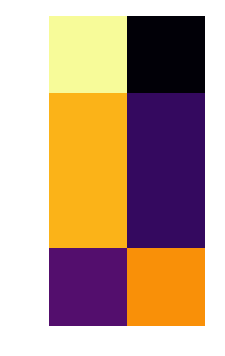

Error


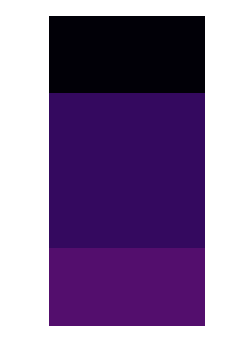

In [7]:
learn(and_dic)

### Run on OR

Predicted


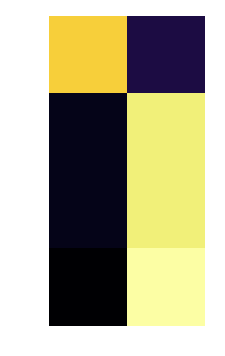

Error


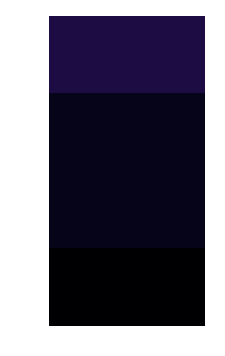

In [8]:
learn(or_dic)

### Run NAND

Predicted


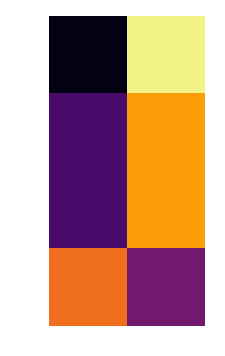

Error


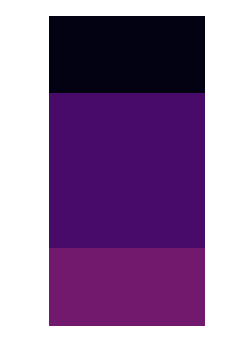

In [9]:
learn(nand_dic)

### Run NOR

Predicted


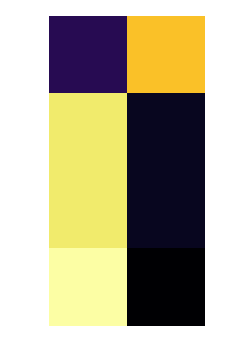

Error


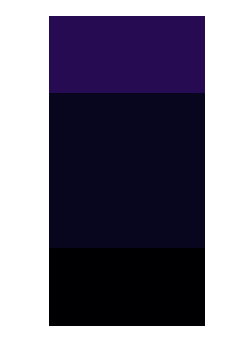

In [10]:
learn(nor_dic)

### Run XOR

Predicted


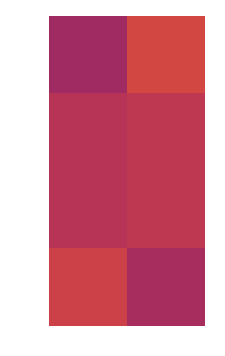

Error


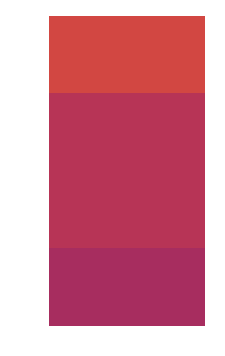

In [11]:
learn(xor_dic)

### Observations

* NAND and NOR are now learned
* Predictibly XOR is syill not learned, but the model foud is different then the previous one